In [8]:
import numpy as np
from numpy import genfromtxt, vstack, sqrt, std, concatenate, reshape, dot
from numpy.linalg import norm, svd
from numpy.core.fromnumeric import argmin
import pandas as pd
from pandas import read_csv, DataFrame, concat
import sys
import matplotlib.pyplot as plt
from scipy.linalg import solve_triangular, qr
import imageio 
from imageio import imread, imsave

# 1. Least Squares problem

def svd_LS(A, b):
    U, Sigma, VT = np.linalg.svd(A, full_matrices=False)
    Sigma_inv = np.diag(1 / Sigma)
    x_svd = VT.T @ Sigma_inv @ U.T @ b

    return x_svd
    

def qr_LS(A, b):
    Rank = np.linalg.matrix_rank(A)
    x_qr = None

    if Rank == A.shape[1]:
        Q_fullr, R_fullr = np.linalg.qr(A)
        y_aux = np.transpose(Q_fullr).dot(b)
        x_qr = solve_triangular(R_fullr, y_aux)
    else:
        Q, R, P = qr(A, mode='economic', pivoting=True)  
        R_def = R[:Rank, :Rank]
        c = np.transpose(Q).dot(b)[:Rank]
        u = solve_triangular(R_def, c)
        v = np.zeros((A.shape[1] - Rank))
        x_qr = np.linalg.solve(np.transpose(np.eye(A.shape[1])[:, P]), np.concatenate((u, v)))
        
    return x_qr


def dataset(degree):
    data = genfromtxt("dades.csv", delimiter="   ")
    points, b = data[:, 0], data[:, 1]
    A = vstack([points ** d for d in range(degree)]).T

    return A, b


def dataset2(degree):
    data = genfromtxt('dades_regressio.csv', delimiter=',')
    A, b = data[:, :-1], data[:, -1]
    return A, b


svd_errors = []
degrees=range(3,10)

for degree in range(3,10):
    A, b = dataset(degree)
    x_svd = svd_LS(A, b)
    x_qr = qr_LS(A, b)
    svd_errors.append(norm(A.dot(x_svd) - b))

min_svd_error_pos = argmin(svd_errors)
best_degree = min_svd_error_pos+3

print("Results for dataset:")
print("Best degree:", best_degree)
A, b = dataset(best_degree)
x_svd = svd_LS(A, b)
x_qr = qr_LS(A, b)
print("\n")
print("LS solution using SVD:", x_svd)
print("Solution norm:", norm(x_svd))
print("Error:", norm(A.dot(x_svd)-b))
print("\n")
print("LS solution using QR:", x_qr)
print("Solution norm:", norm(x_qr))
print("Error:", norm(A.dot(x_qr)-b))
print("\n")


print("Results for dataset2:")
print("Best degree:", best_degree)
A, b = dataset2(best_degree)
x_svd = svd_LS(A, b)
x_qr = qr_LS(A, b)
print("\n")
print("LS solution using SVD:", x_svd)
print("Solution norm:", norm(x_svd))
print("Error:", norm(A.dot(x_svd)-b))
print("\n")
print("LS solution using QR:", x_qr)
print("Solution norm:", norm(x_qr))
print("Error:", norm(A.dot(x_qr)-b))
print("\n")

Results for dataset:
Best degree: 9


LS solution using SVD: [-3.65071224e+01  8.82606571e+01 -8.52771943e+01  4.67979006e+01
 -1.51835594e+01  3.01995638e+00 -3.60208119e-01  2.36093950e-02
 -6.52688305e-04]
Solution norm: 137.20330851555062
Error: 10.845499004346927


LS solution using QR: [-3.65071224e+01  8.82606572e+01 -8.52771943e+01  4.67979006e+01
 -1.51835594e+01  3.01995638e+00 -3.60208119e-01  2.36093950e-02
 -6.52688305e-04]
Solution norm: 137.20330857368776
Error: 10.845499004347579


Results for dataset2:
Best degree: 9


LS solution using SVD: [-2.53249063e+15  2.53249063e+15 -2.56105401e+03  4.06757500e+04
 -2.88066746e+05  1.13796846e+06 -2.72760672e+06  4.06313138e+06
 -3.67815506e+06  1.85278076e+06 -3.98246021e+05]
Solution norm: 3581482594641324.0
Error: 4.4542020954046295


LS solution using QR: [ 1.66061276e+01  0.00000000e+00 -1.88268350e+03  2.99498591e+04
 -2.12104358e+05  8.37034713e+05 -2.00324191e+06  2.97903439e+06
 -2.69206453e+06  1.35366101e+06 -2.90442

Covariance matrix


Total variance in each component:  [7.61343398e-01 1.94087574e-01 4.45690284e-02 2.10159890e-33]


Standard deviation of each component:  [0.49648055 0.47663784 0.47996529 0.21437527]


PCA coordinates of original dataset:  [[-2.15935573e+00 -1.03022338e-01  5.71462351e-01 -2.22044605e-16]
 [-3.81835368e+00  1.54845310e+00 -1.49893793e-01  2.77555756e-16]
 [-1.02314943e+00  1.09731757e+00  7.06441362e-01  2.77555756e-16]
 [-3.28808408e+00 -2.83879995e+00  1.06288188e+00 -1.11022302e-15]
 [-1.85848420e+00 -7.22868121e-01 -1.53291074e-01 -4.44089210e-16]
 [-2.88163363e+00  3.74449451e-01  5.53150287e-01 -8.32667268e-17]
 [-3.62306108e+00 -2.90448787e+00 -1.08966905e+00 -1.41553436e-15]
 [-1.65152000e+00  1.16037729e-01 -9.49576012e-02 -1.94289029e-16]
 [ 2.79520426e+00 -4.51135524e-01  8.56335154e-01  8.32667268e-17]
 [ 4.31871146e+00  2.06044676e-01 -1.14292470e+00  4.44089210e-16]
 [ 3.31051795e+00 -1.76751316e+00  8.16313745e-01 -3.60822483e-16]
 [ 1.02314943e+00 -

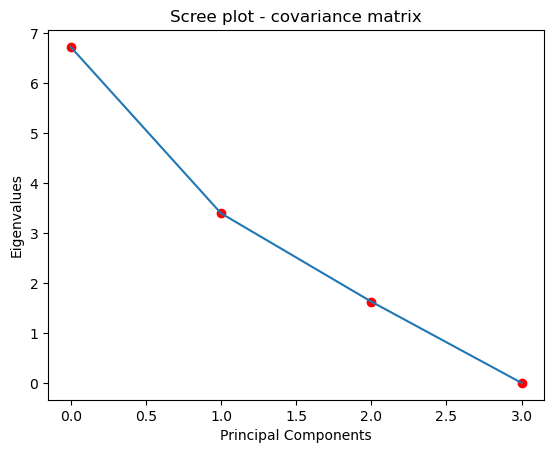



Kasier rule: 3
3/4 rule: 1


Correlation matrix


Total variance in each principal component:  [7.12576603e-01 2.30713116e-01 5.67102809e-02 8.69620064e-33]


Standard deviation of each principal component:  [0.49755605 0.49148625 0.49950077 0.10666871]


PCA coordinates of original dataset:  [[-1.21784990e+00  1.10999758e-01  4.06797330e-01 -2.05044016e-16]
 [-1.77577162e+00  1.30744545e+00 -8.90741366e-02 -4.99194576e-16]
 [-2.19098561e-01  7.98638805e-01  4.87601769e-01 -1.19522597e-16]
 [-2.58352050e+00 -1.56648285e+00  7.65238167e-01 -1.88043428e-16]
 [-1.28239488e+00 -3.20691275e-01 -9.16204201e-02 -1.32532277e-16]
 [-1.50149344e+00  4.77947530e-01  3.95981349e-01 -2.21841713e-16]
 [-2.98688864e+00 -1.60036699e+00 -7.16652819e-01 -3.83978857e-16]
 [-9.24840986e-01  2.06602134e-01 -5.66261917e-02 -1.94086137e-16]
 [ 1.55667306e+00 -5.08806645e-01  5.76675905e-01  2.25426452e-16]
 [ 2.43569980e+00 -2.21999516e-01 -8.13594660e-01  4.10088033e-16]
 [ 1.48276271e+00 -1.40304783e+00 

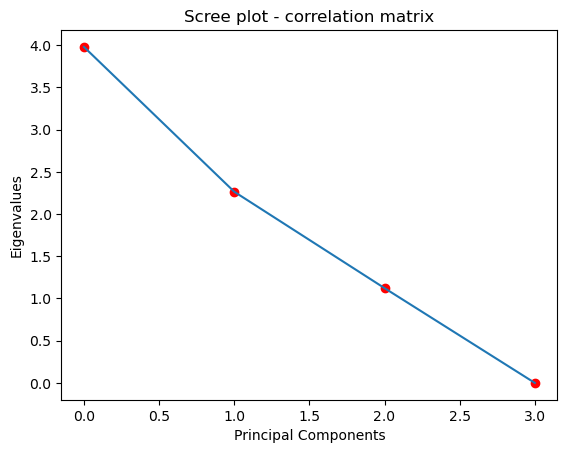



Kasier rule: 3
3/4 rule: 2


Covariance matrix
(58581, 20)


Total variance in each principal component:  [7.22991067e-01 1.57844663e-01 6.68887693e-02 2.88735461e-02
 1.22625722e-02 4.61307556e-03 3.62725141e-03 1.57549266e-03
 4.11913267e-04 3.13735180e-04 1.17355100e-04 1.06287053e-04
 1.02472421e-04 8.10208153e-05 5.17387276e-05 4.36909142e-05
 4.02188378e-05 2.95266449e-05 2.56038410e-05 1.20457000e-29]


Standard deviation of each principal component:  [0.22309921 0.21901579 0.22349963 0.21937802 0.21953661 0.22330006
 0.22007109 0.2072967  0.22041645 0.22099514 0.20324375 0.22251952
 0.2178364  0.22360674 0.22358156 0.22027974 0.18416171 0.2163234
 0.22315241 0.22360558]


PCA coordinates of original dataset:  [[-1.27989078e+00 -1.99894901e-01 -6.77770015e-01 ... -2.65847852e-02
   3.50582584e-01 -2.09940244e-14]
 [-3.80069770e+03  7.26826456e+02 -7.84966475e+01 ...  1.18246018e+01
  -4.76573546e+01 -1.97684595e-11]
 [-3.78134373e+01 -2.68270929e+00 -1.03662184e+01 ... -2.1266

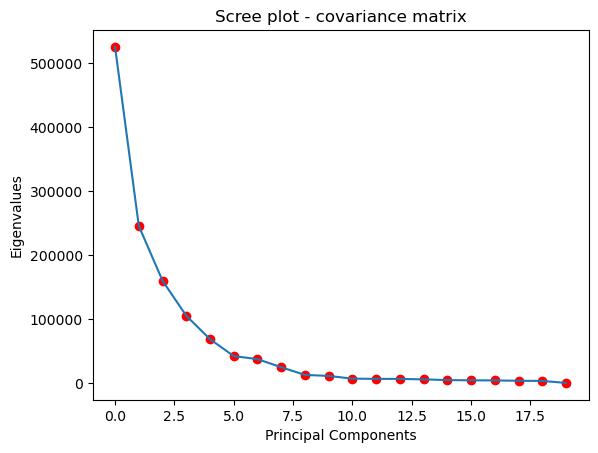



Kasier rule: 19
3/4 rule: 2


Correlation matrix
(58581, 20)


Total variance in each principal component:  [4.99201950e-01 2.94400506e-01 1.29694346e-01 2.90626934e-02
 1.93368984e-02 1.83181111e-02 4.99398947e-03 2.05962308e-03
 8.94546162e-04 7.44010922e-04 3.70865828e-04 2.92277101e-04
 2.47457734e-04 1.52674624e-04 7.43745297e-05 6.73666247e-05
 3.77753029e-05 2.59756942e-05 2.45574643e-05 3.24244840e-30]


Standard deviation of each principal component:  [0.22283796 0.22360278 0.22188608 0.21915855 0.21986138 0.22312883
 0.22358941 0.22352523 0.22305964 0.21646088 0.22356616 0.22360424
 0.22350309 0.22205277 0.22359633 0.22352834 0.22286109 0.22335144
 0.22358615 0.09820026]


PCA coordinates of original dataset:  [[-5.54523094e-04 -8.37209366e-06 -5.41045911e-04 ...  3.78012296e-05
  -1.59880596e-04 -7.11663573e-18]
 [-1.29617793e+00 -5.14172915e-01  4.70726630e-03 ... -2.31504663e-02
   4.09530893e-03 -2.14754864e-15]
 [-1.32513792e-02  7.25613044e-04 -1.04838546e-02 ...  1.3

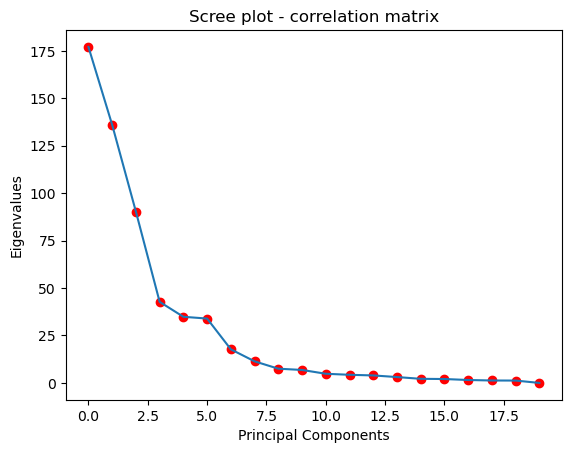



Kasier rule: 19
3/4 rule: 2




In [32]:

def read_dat():
    X = np.genfromtxt('example.dat', delimiter = ' ')
    return X.T

def read_csv():
    X = np.genfromtxt('RCsGoff.csv', delimiter = ',')
    return X[1:,1:].T 


def PCA(matrix_choice, file_choice):
    
    if file_choice == 1: X = read_dat()
    else: X = read_csv()
    
    X = X - np.mean(X, axis = 0)
    n = X.shape[0]
    if matrix_choice == 1: 
        # covariance matrix
        Y = (1 / (np.sqrt( n - 1))) * X.T
        U,S,VH = np.linalg.svd(Y, full_matrices = False)
        total_var = S**2 / np.sum(S**2)
        standard_dev = np.std(VH, axis = 0)
        new_expr_PCA_coord = np.matmul(VH,X).T
        
    else: 
        # correlation matrix
        X = (X.T / np.std(X, axis = 1)).T
        Y = (1 / (np.sqrt( n - 1))) * X.T
        U,S,VH = np.linalg.svd(Y, full_matrices = False)
        
        total_var = S**2 / np.sum(S**2)

        standard_dev = np.std(VH.T, axis = 0)

        new_expr_PCA_coord = np.matmul(VH,X).T
        
    return total_var, standard_dev, new_expr_PCA_coord, S


def Scree_plot(S,number_figure,matrix_type):
    
    if matrix_type == 1:
        #covariance matrix
        plt.figure(number_figure)
        plt.plot(range(len(S)), S)
        for i in range(len(S)):
            plt.scatter(i,S[i],color='red')
        plt.title('Scree plot - covariance matrix')
        plt.xlabel('Principal Components')
        plt.ylabel('Eigenvalues')
        plt.savefig("scree_plot_cov.jpg")
        plt.show()
        
    else:
        #correlation matrix
        plt.figure(number_figure)
        plt.plot(range(len(S)), S)
        for i in range(len(S)):
            plt.scatter(i,S[i],color='red')
        plt.title('Scree plot - correlation matrix')
        plt.xlabel('Principal Components')
        plt.ylabel('Eigenvalues')
        plt.savefig("scree_plot_corr.jpg")
        plt.show()    


def Kasier(S):
    
    count = 0
    for i in range(len(S)):
        if S[i]>1: count += 1
            
    return count


def rule_34(var):
    
    total_var = sum(var)
    new_var = []
    i = 0  
    while sum(new_var) < 3*total_var/4:
        new_var.append(var[i])
        i += 1

    return len(new_var)



## covariance matrix   
print('Covariance matrix')
total_var,standar_dev,new_expr,S = PCA(1,1)
print('\n')
print('Total variance in each component: ',total_var)
print('\n')
print('Standard deviation of each component: ',standar_dev)
print('\n')
print('PCA coordinates of original dataset: ',new_expr)
Scree_plot(S,1,1)
print('\n')
print('Kasier rule:',Kasier(S))
print('3/4 rule:',rule_34(total_var))
print('\n')


## Correlation matrix 
print('Correlation matrix')
total_var,standar_dev,new_expr,S = PCA(0,1)
print('\n')
print('Total variance in each principal component: ',total_var)
print('\n')
print('Standard deviation of each principal component: ',standar_dev)
print('\n')
print('PCA coordinates of original dataset: ',new_expr)
Scree_plot(S,2,0)
print('\n')
print('Kasier rule:',Kasier(S))
print('3/4 rule:',rule_34(total_var)) 
print('\n')      


# RCsGoff.csv

## Covariance matrix   
print('Covariance matrix')
total_var,standar_dev,new_expr,S = PCA(1,0)
print(new_expr.shape)
print('\n')
print('Total variance in each principal component: ',total_var)
print('\n')
print('Standard deviation of each principal component: ',standar_dev)
print('\n')
print('PCA coordinates of original dataset: ',new_expr)
Scree_plot(S,3,1)
print('\n')
print('Kasier rule:',Kasier(S))
print('3/4 rule:',rule_34(total_var))
print('\n')

X_RCsGoff = read_csv()  

data_df = pd.DataFrame(data=new_expr[:20, :].T, columns=[f"PC{i}" for i in range(1, 21)])
variance_df = pd.DataFrame(data=reshape(total_var, (20, 1)), columns=["Variance"])

if 'gene' in data_df.columns: data_df = data_df.drop('gene', axis=1)
data_df.index.name = "Sample"
data_df["Variance"] = variance_df["Variance"]

data_df.to_csv("rcsgoff_covariance.txt", sep='\t')


## correlation matrix   

print('Correlation matrix')
total_var,standar_dev,new_expr,S = PCA(0,0)
print(new_expr.shape)
print('\n')
print('Total variance in each principal component: ',total_var)
print('\n')
print('Standard deviation of each principal component: ',standar_dev)
print('\n')
print('PCA coordinates of original dataset: ',new_expr)
Scree_plot(S,4,0)
print('\n')
print('Kasier rule:',Kasier(S))
print('3/4 rule:',rule_34(total_var)) 
print('\n') 


X_RCsGoff = read_csv()  

data_df = pd.DataFrame(data=new_expr[:20, :].T, columns=[f"PC{i}" for i in range(1, 21)])
variance_df = pd.DataFrame(data=reshape(total_var, (20, 1)), columns=["Variance"])

if 'gene' in data_df.columns: data_df = data_df.drop('gene', axis=1)

data_df.index.name = "Sample"
data_df["Variance"] = variance_df["Variance"]

data_df.to_csv("rcsgoff_correlation.txt", sep='\t')